<a href="https://colab.research.google.com/github/EddyGiusepe/ROC_e_AUC_em_MACHINE_LEARNING/blob/main/ROC_e_AUC_em_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>ROC e AUC nos modelos de MACHINE LEARNING</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

Link de estudo:

* [O que é AUC e ROC nos modelos de Machine Learning](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)

## Importamos as nossas bibliotecas

A biblioteca sklearn possui vários DataSets famosos que podemos utilizar para este teste. A linha $4$ do código abaixo carrega justamente esse DataSet.

In [17]:
from sklearn import metrics                           # Metricas para calcular accuracy score
from sklearn.linear_model import LogisticRegression   # Modelo utilizado
from sklearn.model_selection import train_test_split  # Separa dados de treinamento e teste
from sklearn.datasets import load_breast_cancer       # Carrega o dataset Breast Cancer    
import matplotlib.pyplot as plt                       # Plotagem de gráficos

import pandas as pd


## Dados de teste e treinamento 

Aqui vamos a separar os dados (teste e treinamento).

In [18]:
# Carregando Breast Cancer Dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target



In [20]:
# Linhas e colunas
X.shape

(569, 30)

In [21]:
# Linhas e colunas
y.shape

(569,)

In [22]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [24]:
# Separando o Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=44)


## Criando o modelo 

Aqui criaremos nosso modelo o qual será LogisticRegression, mas você pode utilizar qualquer um. 


Aqui também, mais adiante, vamos comparar com outros modelos.

In [25]:
# Criando um modelo 
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Calculamos a precisão do modelo

In [11]:
# Accuracy
print("Accuracy", metrics.accuracy_score(y_test, y_pred))


Accuracy 0.9590643274853801


## Plotamos a AUC

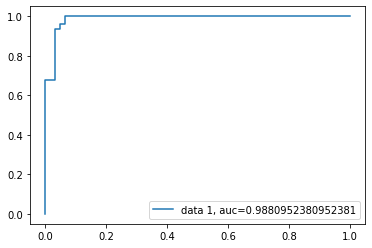

In [26]:
#AUC Curve
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)


A seguir vamos fazer uma comparação entre o ``LogisticRegression`` e um modelo de ``Árvore de Decisão Simples``. Antes de adicionar o código abaixo, remova a linha “plt.show()” do final do código anterior. Ele cria um novo modelo baseado em árvore e plot a AUC junto com a AUC do modelo anterior.

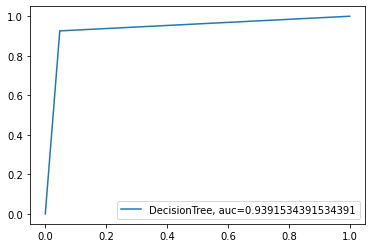

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))
plt.legend(loc=4)
plt.show()


Percebe-se que o modelo com ``DecisionTree`` possui um desempenho inferior do ``LogisticRegression``, pois a área sob a curva é menor no primeiro modelo.


Outro modelo bastante utilizado em classificação é o ``RandomForest``. Vamos fazer a comparação dos três. O código para adicionar o RandomForest é semelhante ao DesicionTree.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


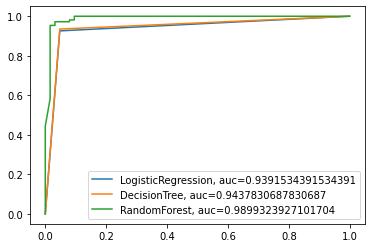

In [28]:
#AUC Curve
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))
plt.legend(loc=4)




from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)


Percebe-se que o desempenho do ``RandomFores`` é superior que os demais.